In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import *
from sklearn import preprocessing
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

# get data
X_train, y_train = load_svmlight_file("D://机器学习实验//lab2//a9a.txt", n_features = 123)
y_train = y_train.reshape(y_train.shape[0], 1)

X_test, y_test = load_svmlight_file("D://机器学习实验//lab2//a9a.t", n_features = 123)
y_test = y_test.reshape(y_test.shape[0], 1)

In [69]:
# hinge loss function
def Loss(X, y, theta):
    epsilon = 1 - y * (X.dot(theta))
    epsilon[epsilon < 0] = 0
    loss = (1.0/2) * np.dot(theta.transpose(), theta).sum() + epsilon.sum() 
    return loss / X.shape[0]
    
# grad
def Grad(theta):
    y = y_train.copy()
    y[(1 - y_train * (X_train * theta)) < 0] = 0
    numm = np.random.randint(0, X_train.shape[0])
    grad = -((X_train)[numm].T * y[numm]).reshape(123, 1)
    
    gradient = theta + grad
    return gradient
         
# SGD
def sgd(theta):
    for i in range(loops):
        grad = Grad(theta)
        theta -= Eta * grad
         
        lossTrain.append(Loss(X_train, y_train, theta))
        lossValidation.append(Loss(X_test, y_test, theta))
        train_accuracy.append(Accuracy(X_train, y_train, theta))
        validation_accuracy.append(Accuracy(X_test, y_test, theta))
         
# calculate accuracy
def Accuracy(X, y, theta):
    acc = X * theta
    acc[acc > 0] = 1
    acc[acc < 0] = -1
    return np.count_nonzero(acc == y) / X.shape[0]

In [70]:
# parameter initialization
m, n = np.shape(X_train)
theta = np.ones((n, 1))
Eta = 0.01
loops = 666

lossTrain = []
lossValidation = []
train_accuracy = []
validation_accuracy = []

The best accuracy of train is  0.8134885292220755
The best accuracy of validation is  0.814446287083103


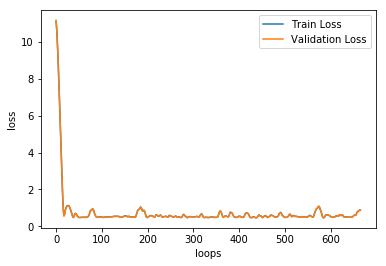

In [71]:
# parameter initialization
theta = np.ones((n, 1))

lossTrain_NAG = []
lossValidation_NAG = []
train_accuracy_NAG = []
validation_accuracy_NAG = []

# NAG optimizer
def NAG(theta):
    gamma = 0.9
    V = 0
    
    for i in range(0, loops):
        grad = Grad(theta - gamma * V)
        V = gamma * V + Eta * grad
        theta = theta - V
        
        lossTrain_NAG.append(Loss(X_train, y_train, theta))
        lossValidation_NAG.append(Loss(X_test, y_test, theta))
        train_accuracy_NAG.append(Accuracy(X_train, y_train, theta))
        validation_accuracy_NAG.append(Accuracy(X_test, y_test, theta))
        
NAG(theta)

print("The best accuracy of train is ", max(train_accuracy_NAG))
print("The best accuracy of validation is ", max(validation_accuracy_NAG))

# draw
plt.plot(lossTrain_NAG, label = "Train Loss") 
plt.plot(lossValidation_NAG, label = "Validation Loss")
plt.xlabel("loops")
plt.ylabel("loss")
plt.legend()
plt.show()

The best accuracy of train is  0.8160068793955959
The best accuracy of validation is  0.8157975554327129


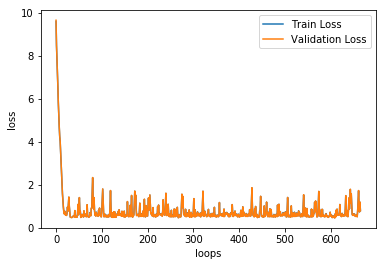

In [72]:
# parameter initialization
theta = np.ones((n, 1))

lossTrain_RMSProp = []
lossValidation_RMSProp = []
train_accuracy_RMSProp = []
validation_accuracy_RMSProp = []

# RMSProp optimizer
def RMSProp(theta):
    gamma = 0.9
    Gt = 0
    epsilon = 0.00000001
    
    rate = 0.45
    
    for i in range(0, loops):
        grad = Grad(theta)
        Gt = gamma * Gt + ((1 - gamma) * (grad ** 2)).sum()
        theta = theta - rate * grad / math.sqrt(Gt + epsilon)
        
        lossTrain_RMSProp.append(Loss(X_train, y_train, theta))
        lossValidation_RMSProp.append(Loss(X_test, y_test, theta))
        train_accuracy_RMSProp.append(Accuracy(X_train, y_train, theta))
        validation_accuracy_RMSProp.append(Accuracy(X_test, y_test, theta))

RMSProp(theta)

print("The best accuracy of train is ", max(train_accuracy_RMSProp))
print("The best accuracy of validation is ", max(validation_accuracy_RMSProp))

# draw
plt.plot(lossTrain_RMSProp, label = "Train Loss") 
plt.plot(lossValidation_RMSProp, label = "Validation Loss")
plt.xlabel("loops")
plt.ylabel("loss")
plt.legend()
plt.show()

The best accuracy of train is  0.8124750468351709
The best accuracy of validation is  0.8122351206928321


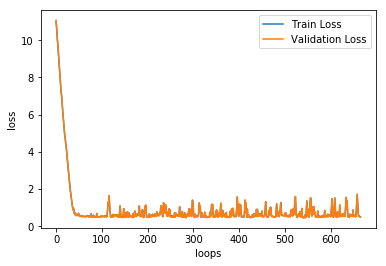

In [73]:
# parameter initialization
theta = np.ones((n, 1))

lossTrain_AdaDelta = []
lossValidation_AdaDelta = []
train_accuracy_AdaDelta = []
validation_accuracy_AdaDelta = []

# AdaDelta optimizer
def AdaDelta(theta):
    gamma = 0.87
    Gt = 0
    epsilon = 0.00000001
    delta_t = 0
    delta_theta = 0
    
    rate = 1000
    
    for i in range(0, loops):
        grad = Grad(theta)
        Gt = gamma * Gt + ((1 - gamma) * (grad ** 2)).sum()
        delta_theta = -math.sqrt(delta_t + epsilon) *grad / math.sqrt(Gt + epsilon)
        delta_t = gamma * delta_t + ((1 - gamma) * (delta_theta ** 2)).sum()
        theta = theta + rate * delta_theta
        
        lossTrain_AdaDelta.append(Loss(X_train, y_train, theta))
        lossValidation_AdaDelta.append(Loss(X_test, y_test, theta))
        train_accuracy_AdaDelta.append(Accuracy(X_train, y_train, theta))
        validation_accuracy_AdaDelta.append(Accuracy(X_test, y_test, theta))

AdaDelta(theta)

print("The best accuracy of train is ", max(train_accuracy_AdaDelta))
print("The best accuracy of validation is ", max(validation_accuracy_AdaDelta))

# draw
plt.plot(lossTrain_AdaDelta, label = "Train Loss") 
plt.plot(lossValidation_AdaDelta, label = "Validation Loss")
plt.xlabel("loops")
plt.ylabel("loss")
plt.legend()
plt.show()

The best accuracy of train is  0.7591904425539756
The best accuracy of validation is  0.7637737239727289


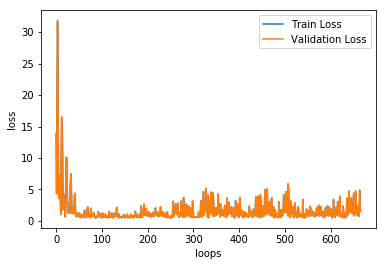

In [91]:
# parameter initialization
theta = np.ones((n, 1))

lossTrain_Adam = []
lossValidation_Adam = []
train_accuracy_Adam = []
validation_accuracy_Adam = []

# Adam optimizer
def Adam(theta):
    m = 0
    beta = 0.9
    gamma = 0.999
    Gt = 0
    t = 0
    epsilon = 0.00000001
    
    rate = 0.475
    
    for i in range(0, loops):
        grad = Grad(theta)
        t += 1
        m = beta * m + ((1 - beta) * grad).sum()
        Gt = gamma * Gt + ((1 - gamma) * (grad ** 2)).sum()
        mt = m / (1 - (beta ** t))
        gt = Gt / (1 - (gamma ** t))
        theta = theta - rate * mt / (math.sqrt(gt) + epsilon)
        
        lossTrain_Adam.append(Loss(X_train, y_train, theta))
        lossValidation_Adam.append(Loss(X_test, y_test, theta))
        train_accuracy_Adam.append(Accuracy(X_train, y_train, theta))
        validation_accuracy_Adam.append(Accuracy(X_test, y_test, theta))

Adam(theta)

print("The best accuracy of train is ", max(train_accuracy_Adam))
print("The best accuracy of validation is ", max(validation_accuracy_Adam))

# draw
plt.plot(lossTrain_Adam, label = "Train Loss") 
plt.plot(lossValidation_Adam, label = "Validation Loss")
plt.xlabel("loops")
plt.ylabel("loss")
plt.legend()
plt.show()

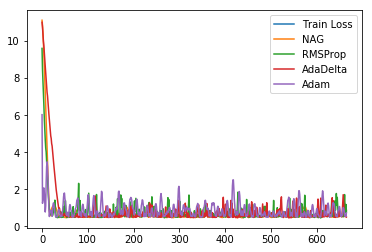

In [75]:
plt.plot(lossTrain, label = "Train Loss")
plt.plot(lossTrain_NAG, label = "NAG")
plt.plot(lossTrain_RMSProp, label = "RMSProp")
plt.plot(lossTrain_AdaDelta, label = "AdaDelta")
plt.plot(lossTrain_Adam, label = "Adam")
plt.legend()
plt.show()